In [1]:
import pandas as pd

# 1. Données

In [2]:
RAW_PATH = 'data/1_raw_data/'
DATA_PATH = 'data/2_preprocessed_data/'

## 1.1. Business

In [3]:
business = pd.read_json(RAW_PATH + 'business.json', lines=True)

In [4]:
business.shape

(150346, 14)

In [5]:
business.sample(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
25357,kOZ12UY_vmEet96jILnPvA,South Tampa Tanning Spa,3830 W Neptune St,Tampa,FL,33629,27.930133,-82.507088,3.0,6,0,"{'RestaurantsPriceRange2': '2', 'BusinessParki...","Beauty & Spas, Tanning, Day Spas","{'Monday': '9:0-22:0', 'Tuesday': '9:0-22:0', ..."
138995,m0t4w58qFv7XlJHMEMi-DA,China Valley,"10110 N Oracle Rd, Ste 180",Oro Valley,AZ,85704,32.390206,-110.963320,4.0,100,1,"{'RestaurantsTableService': 'True', 'Restauran...","Chinese, Szechuan, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
40208,W7gSJz80DywKnPRIGjA2Bw,Derf's Cafe,2000 De La Vina St,Santa Barbara,CA,93105,34.428957,-119.716972,3.5,126,1,"{'NoiseLevel': 'u'average'', 'BusinessAcceptsC...","Restaurants, American (Traditional)","{'Monday': '10:0-21:30', 'Tuesday': '10:0-21:3..."
126635,SIj4scSfPIR59US0hxD7nw,Pronto Bistro,43 N Bailey Rd,Thorndale,PA,19372,39.995536,-75.760442,3.5,45,0,"{'Caters': 'True', 'RestaurantsAttire': 'u'cas...","Nightlife, Caterers, Italian, Restaurants, San...","{'Tuesday': '16:0-0:0', 'Wednesday': '16:0-0:0..."
26516,_o3AtnA941ClNRa8Rx7c-A,Rite Aid,35 S Milpas St,Santa Barbara,CA,93103,34.421468,-119.677352,1.5,31,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Shopping, Food, Drugstores, Convenience Stores","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."


In [6]:
business.isnull().sum()

business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64

In [7]:
business.categories.fillna('Unknown', inplace=True)

In [8]:
business[(business.categories.apply(lambda x: x.count('Restaurant'))>0) & (business.city == 'Philadelphia')]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."
28,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,0,"{'Smoking': 'u'no'', 'NoiseLevel': 'u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ..."
31,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150287,VZbkSeZtFynEascotq7ExA,Ali Baba Magic Food,37TH And Walnut,Philadelphia,PA,19104,39.953391,-75.196765,4.0,8,0,"{'GoodForKids': 'False', 'RestaurantsReservati...","Restaurants, Food Stands",None
150298,gPr1io7ks0Eo3FDsnDTYfg,Tata Cafe,7201 Germantown Ave,Philadelphia,PA,19119,40.060414,-75.191084,4.0,21,0,"{'RestaurantsGoodForGroups': 'True', 'Business...","Sandwiches, Restaurants, Italian","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ..."
150306,wVxXRFf10zTTAs11nr4xeA,PrimoHoagies,6024 Ridge Ave,Philadelphia,PA,19128,40.032483,-75.214430,3.0,55,1,"{'NoiseLevel': 'u'average'', 'RestaurantsTakeO...","Restaurants, Specialty Food, Food, Sandwiches,...","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'..."
150319,8n93L-ilMAsvwUatarykSg,Kitchen Gia,3716 Spruce St,Philadelphia,PA,19104,39.951018,-75.198240,3.0,22,0,"{'RestaurantsGoodForGroups': 'True', 'BikePark...","Coffee & Tea, Food, Sandwiches, American (Trad...","{'Monday': '9:0-19:30', 'Tuesday': '9:0-19:30'..."


## 1.2. Review

In [9]:
review = pd.read_json(RAW_PATH + 'review.json',
                      lines=True,
                     dtype={
                            "review_id": str,
                            "user_id": str,
                            "business_id": str,
                            "stars": 'uint8',
                            "useful": 'int16',
                            "funny": 'int16',
                            "cool": 'int16',
                            "text": str,
                            "date": "datetime64[ns]",
                        }
                     )

In [10]:
review.describe()

,stars,useful,funny,cool
count,6.990280e+06,6.990280e+06,6.990280e+06,6.990280e+06
mean,3.748584e+00,1.184609e+00,3.265596e-01,4.986175e-01
std,1.478705e+00,3.253767e+00,1.688729e+00,2.172460e+00
min,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,5.000000e+00,1.182000e+03,7.920000e+02,4.040000e+02


- Stars  :  1 à 5
- Useful : -1 à 1182
- Funny  : -1 à 792
- Cool   : -1 à 404

In [11]:
review.shape

(6990280, 9)

## 1.3. Photos

In [ ]:
photos = pd.read_json(RAW_PATH + 'photos.json', lines=True)

In [ ]:
photos.head()

In [ ]:
photos.label.value_counts()

## 1.4. Divers

### Users

In [13]:
user = pd.read_json(RAW_PATH + 'user.json', lines=True)

In [14]:
user.shape

(1987897, 22)

In [15]:
user.sample(5)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
1693935,mzdnvlKh_rsv21z92hZFZQ,Chad,11,2014-10-03 20:25:52,11,5,9,,AyYKTOCL5qM8589oBsqbfA,0,...,0,0,0,0,0,1,0,0,0,0
1730454,7TMe_hUVcqEsCpzWUzGlfQ,Kayla,5,2020-02-09 19:07:11,1,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
606887,ym3R1uiCk0QIqP9edQwSKg,Jen,124,2007-10-10 16:38:42,57,17,35,,"ZqJl5q1D4SoRO90SB_EnDA, pR4aCoE5lplAParShrBMiw...",4,...,0,0,0,0,1,1,1,1,3,0
1613956,QPOe62HX6GHN12r0ZAWc7Q,Larry,20,2014-03-03 22:27:28,8,2,2,,"8Upqk9jHtD9VtiuG60bt2g, 9suQSwX4hx6t_FKOL2w4JQ...",2,...,1,0,0,0,0,0,0,0,0,0
416564,cm_oELjLAVEuqvMuD6gN9g,Bruce,11,2012-09-20 20:50:57,19,8,3,,"Zd9THQJW58_SWlajMX4ykw, TgKna5SafzsrJGk02ALoNQ...",1,...,0,0,0,0,0,0,0,0,0,0


### Checkin

In [16]:
checkin = pd.read_json(RAW_PATH + 'checkin.json', lines=True)

In [17]:
checkin.shape

(131930, 2)

In [18]:
checkin.sample(5)

,business_id,date
33498,F87os-6oNyUAEeGxQJKFkw,"2016-11-05 09:32:27, 2016-11-08 19:27:20, 2016..."
48071,MLn19rBl5JZUqwWKHoy6MA,"2013-10-02 21:41:30, 2013-10-05 17:37:10, 2013..."
49858,NFeR6n6QM7C-3ZgjbVoqTA,"2011-01-22 06:44:27, 2011-08-25 18:01:16, 2011..."
91121,gGAfy1pNZHqVEItdFG0UvQ,2014-12-18 20:59:38
110539,pjzr8p3E9Tp04059DjZgyQ,"2014-04-10 20:17:07, 2014-04-19 21:14:08, 2014..."


### Tip

In [19]:
tip = pd.read_json(RAW_PATH + 'tip.json', lines=True)

In [20]:
tip.shape

(908915, 5)

In [21]:
tip.sample(5)

,user_id,business_id,text,date,compliment_count
898558,tzKvRnRIemqa727XYV45UA,qb28j-FNX1_6xm7u372TZA,"Great Gumbo, Jambalaya & Bread Pudding. And th...",2014-07-20 17:55:46,0
466329,sNeIEDsCcf6wQRRiqvtjTg,yI-ahfduU45_bZa3ZgEx4w,It's just too bad Jockamo's pizza is a block a...,2013-10-11 23:46:23,0
133398,1sGYXSkJHPhJ6wQtc-RbZw,-QI8Qi8XWH3D8y8ethnajA,Off to Denver ..,2011-10-30 11:11:07,0
335284,SXeMGP5lNgc03z7cl9Xihg,oxsTUf9HsYXVdJSXsJdabQ,Limited food.,2013-11-08 02:03:06,0
232222,4HazzLJz8DiohAiIBXGISQ,eAc2AMfLy97r_AQY1IieGg,Margaritas are 2 for $5 & the salsa is hot!,2017-05-24 22:40:26,0


# 2. Sélection des données

## 2.1. Sélection des restaurants

Pour pouvoir conserver les avis/reviews des restaurants uniquement, il nous faut réunir les données de review.json et de business.json.

In [22]:
merged_data = pd.merge(
    review,
    business,
    how="left",
)

C:\Users\USER\AppData\Local\Temp\ipykernel_14672\798884307.py:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_data = pd.merge(


In [23]:
merged_data.sample(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,name,...,city,state,postal_code,latitude,longitude,review_count,is_open,attributes,categories,hours
990294,LjKQUaiKy1buR79y3uCTaQ,b5OH6l-egiuc0ET8DlB9og,NHb6QTrJOnyIj-Zd0fYzFg,5,1,0,0,This is probably the best place to eat in Soul...,2012-07-14 00:57:38,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1766868,eeQPaPdLZ-XO2g5pjsjeMw,uUH_58_pfFF6ZLqUmm2D8Q,j8feOxyJqlIJWOi8su2qzw,1,0,2,0,VERY disappointed on our recent visit to SG. ...,2018-04-01 05:55:19,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5435789,zrxCDWxL8lW3aPcYbs4ENw,LFdn4pmYNK2MyakZGhFUVQ,PPU4HJ_-WUAHSsL6uylhSA,5,1,0,0,"AS you can see, I gave them five stars. Why? T...",2014-04-15 13:50:19,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6497253,XQHTHnxAd0W_Gwyvi89IDQ,yjebCrYUsbP80wd1dNn8YQ,5quqExjLtFNhykec_na8pg,5,3,1,3,Walk in breathe deep. aaaa spice. First order ...,2011-03-05 01:19:41,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6093770,g6SD6Davrp10TgmDI3A97A,Umgzpg4oFU4R7H4KgMiNmw,zT2OzXDWKK1abapHs2RUrQ,5,0,0,0,The service keeps getting better...Haley was n...,2018-04-08 22:05:03,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On élimine les lignes dont les catégories ne sont pas renseignés (NaN).

In [24]:
merged_data.dropna(subset=['categories'], inplace=True)

In [25]:
selected_data = merged_data[(merged_data.categories.apply(lambda x: x.count('Restaurant'))>0)]
selected_data.shape

(629803, 21)

Nous n'avons plus que 630 000 avis.

In [26]:
selected_data.stars.value_counts()

4    495596
3     72414
5     46375
2     12163
1      3255
Name: stars, dtype: int64

<Axes: ylabel='stars'>

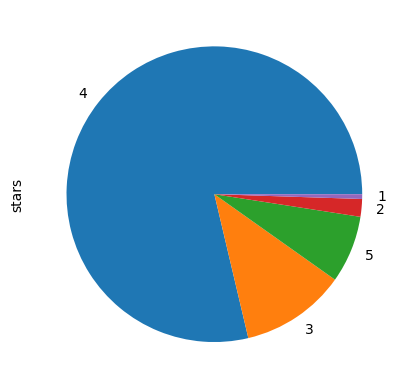

In [27]:
selected_data.stars.value_counts().plot.pie()

On peut avoir que les avis sont nettement positifs.

## 2.2. Sélection selon la note

### 2.2.1. Avis négatifs

In [28]:
bad_reviews_sample = selected_data[selected_data.stars < 3].sample(7500)

In [29]:
bad_reviews_sample.sample(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,name,...,city,state,postal_code,latitude,longitude,review_count,is_open,attributes,categories,hours
5344585,93cJNlTVk_zZNe762hNTcg,IkvPWXfwfJuMH9DZkUvH6Q,Z_hkvKzaCLUMPPblg1Hlnw,2,1,0,0,The chicken tasted fine but it took ten minute...,2018-01-07 16:22:44,Church's Chicken,...,Indianapolis,IN,46241,39.753940,-86.247724,5.0,1.0,"{'GoodForKids': 'True', 'RestaurantsGoodForGro...","Restaurants, Fast Food, Chicken Wings, Chicken...","{'Monday': '10:30-22:0', 'Tuesday': '10:30-22:..."
4373515,b4JNbQwZ-sYnMPOYCpIRsA,2xmkiFW8Yftk9Hv6X_5NgA,ijiuTK4UjT0wGBGP6fQq5Q,2,0,0,0,We went on June 11 at about 4:30 and got a tab...,2016-06-21 12:44:13,Outback Steakhouse,...,Nashville,TN,37209,36.132541,-86.895287,127.0,1.0,"{'BikeParking': 'True', 'WiFi': 'u'free'', 'Re...","Restaurants, Steakhouses","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ..."
2441554,7jbSqdU8NkQHv__7eSilfg,Us5LJwiMKpdhdvTGkro5HQ,snV6gaFbAv77wApb8kUJDw,2,0,0,0,They've gone up on their food prices and are t...,2016-09-16 00:00:13,Buffalo Wild Wings,...,Metairie,LA,70002,30.002854,-90.160002,230.0,1.0,"{'WiFi': 'u'free'', 'GoodForKids': 'True', 'Bi...","Sports Bars, Chicken Wings, American (New), Be...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
5612815,b_LjtppbxXbdBOqX_cOPxQ,9TjapCd1lWq3DxzjKbLF8g,dzPPxDpiuMrG7Uv7rEJobA,1,0,0,0,If I could give less stars I would.. I swear ...,2016-09-19 00:57:43,Taco Bell,...,Saint Louis,MO,63108,38.650827,-90.263416,28.0,1.0,"{'RestaurantsAttire': 'u'casual'', 'OutdoorSea...","Tex-Mex, Restaurants, Breakfast & Brunch, Mexi...","{'Monday': '8:0-2:0', 'Tuesday': '8:0-2:0', 'W..."
3842731,INh6WhGkhCpAKdCbmdfyiQ,lR3YJZeSzywRKq768_l9AQ,R1lq1J42UkLz4sEOOG6CVw,2,0,0,0,"When you order a ""twice the sausage egg and ch...",2017-04-18 13:52:52,Steak ’n Shake,...,St. Louis,MO,63143,38.612793,-90.326859,107.0,0.0,"{'Alcohol': 'u'none'', 'RestaurantsPriceRange2...","American (Traditional), Burgers, American (New...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."


In [30]:
bad_reviews_sample.shape

(7500, 21)

In [31]:
bad_reviews_sample_text = bad_reviews_sample.text

### 2.2.2. Avis positifs

In [32]:
good_reviews_sample = selected_data[review.stars > 4].sample(7500)

C:\Users\USER\AppData\Local\Temp\ipykernel_14672\4089753765.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  good_reviews_sample = selected_data[review.stars > 4].sample(7500)


In [33]:
good_reviews_sample.sample(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,name,...,city,state,postal_code,latitude,longitude,review_count,is_open,attributes,categories,hours
6815508,gAe0A5Pg9mRbluIhgAwaRA,sEYbNOmKl19dSoPwT7x6Cw,VKaxKK37-XMIbBYfq9PhIg,5,0,0,0,This was delicious! My husband and I got the g...,2019-07-13 23:01:40,Poké Island Plus,...,Oldsmar,FL,34677,28.035032,-82.654351,86.0,1.0,"{'RestaurantsReservations': 'True', 'Restauran...","Asian Fusion, Vietnamese, Food, Bubble Tea, Po...","{'Monday': '0:0-0:0', 'Tuesday': '11:30-20:0',..."
3367892,WUgwjp8SYakvS5_wfBc5gg,ryisT19-tzvMyVVi0iLvwA,RTsCMl4ifmjMzfGQg2d2pw,5,10,7,8,"(to the tune of ""Dancing Queen"" by ABBA)\n\nOO...",2019-10-11 11:32:37,Belgrade Deli,...,Philadelphia,PA,19125,39.973214,-75.132240,9.0,0.0,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Convenience Stores, Grocery, Food, Restaurants...","{'Monday': '8:0-21:0', 'Tuesday': '8:0-21:0', ..."
3444695,Qk4K6CMM7z8I7VKR1wdKaQ,Epq0q9OoLP7VMGouhRK5tw,NrmcBZSjxvOPucWkY8dkHQ,5,0,0,0,"We got 2 loaded potatoes today,they were huge ...",2021-10-21 00:53:55,Loaded,...,Clearwater,FL,33765,27.967738,-82.758638,23.0,1.0,"{'BikeParking': 'True', 'RestaurantsTableServi...","Food, Salad, Comfort Food, Chicken Wings, Amer...","{'Tuesday': '8:0-20:0', 'Wednesday': '8:0-20:0..."
6934964,eSm5l-BHvf-H2fW3e_OmZA,k1XklQ6WmSd5PCawmpGuMg,SK8mugK0lNcb0okR5pQ8pQ,5,3,0,3,This place is about a 30 minute drive from dow...,2020-10-18 21:58:25,St Yared Ethiopian Restaurant,...,Indianapolis,IN,46256,39.934860,-85.951146,250.0,1.0,"{'RestaurantsTakeOut': 'True', 'Caters': 'True...","Ethiopian, Food, Restaurants, Coffee & Tea, Je...","{'Tuesday': '11:0-20:0', 'Wednesday': '11:0-20..."
2829561,s1_eM_FFGfDWykbMzM9FuQ,W77O-Iurt9ULdHNjYwYm3Q,1FYdMkv1bc-sKUrjalyKxQ,5,0,0,0,I love local donuts shops. This one did not di...,2017-12-17 20:34:51,Hole In One Donut,...,Tampa,FL,33613,28.077636,-82.459766,214.0,1.0,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Restaurants, Donuts, Breakfast & Brunch, Food","{'Tuesday': '5:0-13:0', 'Wednesday': '5:0-13:0..."


In [34]:
good_reviews_sample_text = good_reviews_sample.text

### 2.2.3. Avis moyen

In [35]:
reviews_sample = selected_data[(review.stars > 2) & (review.stars < 5)].sample(7500)

C:\Users\USER\AppData\Local\Temp\ipykernel_14672\2421031888.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  reviews_sample = selected_data[(review.stars > 2) & (review.stars < 5)].sample(7500)


In [36]:
reviews_sample_text = reviews_sample.text

### 2.2.4. Réunion des 3 dataset

In [37]:
all_reviews = bad_reviews_sample_text.append(good_reviews_sample_text)

C:\Users\USER\AppData\Local\Temp\ipykernel_14672\2061179507.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_reviews = bad_reviews_sample_text.append(good_reviews_sample_text)


In [38]:
all_reviews = all_reviews.append(reviews_sample_text)

C:\Users\USER\AppData\Local\Temp\ipykernel_14672\3125369326.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_reviews = all_reviews.append(reviews_sample_text)


## 3. Export

In [42]:
bad_reviews_sample_text.to_csv(DATA_PATH + 'bad_reviews', index=False)

In [43]:
good_reviews_sample_text.to_csv(DATA_PATH + 'good_reviews', index=False)

In [45]:
all_reviews.to_csv(DATA_PATH + 'sample_reviews', index=False)